<a href="https://colab.research.google.com/github/gwangjinjeong/Pytorch/blob/master/basic/00_Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Preparation

In [2]:
# These are the libraries will be used for this lab.
import torch 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  
torch.__version__

'1.4.0'

This is the function for plotting diagrams. You will use this function to plot the vectors in Coordinate system.

In [0]:
# Plot vecotrs, please keep the parameters in the same length
# @param: Vectors = [{"vector": vector variable, "name": name of vector, "color": color of the vector on diagram}]   
def plotVec(vectors):
  ax1 = plt.axes()
  # For loop to draw the vectors
  for vec in vectors:
    ax.arrow(0, 0, *vec["vector"], head_width = 0.05,color = vec["color"], head_length = 0.1)
    plt.text(*(vec["vector"] + 0.1), vec["name"])

  plt.ylim(-2,2)
  plt.xlim(-2,2)

<!--Empty Space for separating topics-->

## 1. Types and Shape

int로 이뤄진 list를 Tensor로 바꾸는 과정


In [0]:
int64tensor = torch.tensor([0, 1, 2, 3, 4])
print(int64tensor.dtype)
print(int64tensor.type())

torch.int64
torch.LongTensor


Float로 이뤄진 list를 Tensor로 바꾸는 과정

In [0]:
floatTensor = torch.tensor([0.0, 1.0, 2.0, 3.0, 4.0])
print(floatTensor.dtype)
print(floatTensor.type())

torch.float32
torch.FloatTensor


Float로 이뤄진 list를 int Tensor로 바꾸는 과정

In [0]:
print("The dtype of tensor object is: ", floatTensor.dtype)
print("The type of tensor object is: ", floatTensor.type())

The dtype of tensor object is:  torch.float32
The type of tensor object is:  torch.FloatTensor


### Method
* Size : tensor내 element 갯수
* ndimension : tensor의 차원 [1차원 : (0) // 2차원 : (0,0)]
* view : tensor 확인


In [0]:
print('Before')
print(floatTensor,
      floatTensor.size(),
      floatTensor.ndimension(),sep='\n')
print()
print('After')
twoD_floatTensor = floatTensor.view(5, 1)
print(twoD_floatTensor,
      twoD_floatTensor.size(),
      twoD_floatTensor.ndimension(), sep='\n')
# 전치를 만드는 쉬운방법
twoD_floatTensor = floatTensor.view(-1, 1)


Before
tensor([0., 1., 2., 3., 4.])
torch.Size([5])
1

After
tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
torch.Size([5, 1])
2


### Numpy array to a tensor

In [0]:
np_array = np.array([0.0, 1.0, 2.0, 3.0, 4.0])

In [0]:
new_tensor = torch.from_numpy(np_array)
print(new_tensor.dtype)
print(new_tensor.type())
back_to_numpy = new_tensor.numpy()
print(back_to_numpy)
print(back_to_numpy.dtype)

torch.float64
torch.DoubleTensor
[0. 1. 2. 3. 4.]
float64


Array와 Tensor간에는 연결되어있다.

In [0]:
np_array[:] = 0
print(new_tensor)
print(back_to_numpy)

tensor([0., 0., 0., 0., 0.], dtype=torch.float64)
[0. 0. 0. 0. 0.]


### Pandas series to Tensor

In [0]:
pandas_series=pd.Series([0.1, 2, 0.3, 10.1])

In [0]:
new_tensor=torch.from_numpy(pandas_series.values)
print(new_tensor)
print(new_tensor.dtype)
print(new_tensor.type())

tensor([ 0.1000,  2.0000,  0.3000, 10.1000], dtype=torch.float64)
torch.float64
torch.DoubleTensor


In [0]:
this_tensor=torch.tensor([0,1,2,3]) 

**.item** method를 사용하면 해당 Tensor의 값을 반환한다.

In [0]:
print(this_tensor[0].item())
print(type(this_tensor[0].item()))

0
<class 'int'>


**tolist()** method를 사용하면 Tensor를 list로 반환

In [0]:
torch_to_list=this_tensor.tolist()

print('tensor:', this_tensor,"\nlist:",torch_to_list)

tensor: tensor([0, 1, 2, 3]) 
list: [0, 1, 2, 3]


## 2. Indexing and Slicing

In [0]:
tensor_sample = torch.tensor([20, 1, 2, 3, 4])

첫번째 sample을 바꾼다고 한다면,

In [0]:
print(tensor_sample)
tensor_sample[0] = 100
print(tensor_sample)

tensor([20,  1,  2,  3,  4])
tensor([100,   1,   2,   3,   4])


일부분만 바꿀 수 도있다.

In [0]:
print(tensor_sample)
tensor_sample[[1, 3]] = 100000
print(tensor_sample)

tensor([100,   1,   2,   3,   4])
tensor([   100, 100000,      2, 100000,      4])


**Practice**

Practice: Change the values on index 3, 4, 7 to 0

In [0]:
practice_tensor = torch.tensor([2, 7, 3, 4, 6, 2, 3, 1, 2])

Double-click <b>here</b> for the solution.
<!-- 
selected_indexes = [3, 4, 7]
practice_tensor[selected_indexes] = 0
print("New Practice Tensor: ", practice_tensor)
-->

## 3. Tensor Functions

In [0]:
math_tensor = torch.tensor([1.0, -2.0, 3, -4])

In [0]:
print("The mean of math_tensor: ", math_tensor.mean())
print("The standard deviation of math_tensor: ", math_tensor.std())
print("The max of math_tensor", math_tensor.max())
print("The min of math_tensor ", math_tensor.min())

The mean of math_tensor:  tensor(-0.5000)
The standard deviation of math_tensor:  tensor(3.1091)
The max of math_tensor tensor(3.)
The min of math_tensor  tensor(-4.)


### Draw Sin graph

#### torch.linspace()

steps parameter

In [0]:
# First try on using linspace to create tensor
len_5_tensor = torch.linspace(-2, 2, steps = 5)
len_9_tensor = torch.linspace(-2, 2, steps = 9)
print (len_5_tensor)
print (len_9_tensor)

tensor([-2., -1.,  0.,  1.,  2.])
tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000])


In [0]:
# Construct the tensor within 0 to 360 degree
pi_tensor = torch.linspace(0, 2*np.pi, 100)
sin_result = torch.sin(pi_tensor)

Plot the result to get a clearer picture. You must cast the tensor to a numpy array before plotting it.

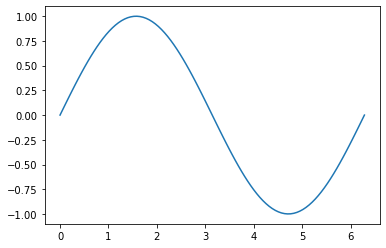

In [0]:
plt.plot(pi_tensor.numpy(), sin_result.numpy())

**Practice**

tensor(1.5708) tensor(0.)


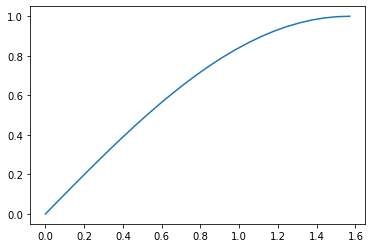

In [0]:
# Practice: Create your tensor, print max and min number, plot the sin result diagram
your_tensor = torch.linspace(0,np.pi/2, steps=25)
print(your_tensor.max(),
     your_tensor.min())
plt.plot(your_tensor.numpy(),torch.sin(your_tensor))
# Type your code here

## 4. Tensor Operations

In [0]:
u = torch.tensor([1, 0])
v = torch.tensor([0, 1])

In [0]:
print('u + v = ',u + v)
print('u - v = ',u-v)
print('u + 1 = ',u + 1)
print('2 * u = ',2 * u)
print('u * v = ',u*v)
print('u o v = ',torch.dot(u,v))

u + v =  tensor([1, 1])
u - v =  tensor([ 1, -1])
u + 1 =  tensor([2, 1])
2 * u =  tensor([2, 0])
u * v =  tensor([0, 0])
u o v =  tensor(0)


matrix multiplication

In [3]:
A = torch.tensor([[0, 1, 1], [1, 0, 1]])
B = torch.tensor([[1, 1], [1, 1], [-1, 1]])

A_times_B = torch.mm(A,B)
print("The result of A * B: ", A_times_B)

The result of A * B:  tensor([[0, 2],
        [0, 2]])
